# Fe test

In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import logging
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from ase import Atoms
from ase.io import read

from m_ff.configurations import carve_confs
from m_ff.models import TwoBodySingleSpeciesModel, ThreeBodySingleSpeciesModel, CombinedSingleSpeciesModel
from m_ff.calculators import TwoBodySingleSpecies, ThreeBodySingleSpecies, CombinedSingleSpecies

logging.basicConfig(level=logging.INFO)

## Parameters

In [4]:
# Parameters
directory = Path('data/Fe_vac/')
r_cut = 4.45
sigma_2b = 0.3
sigma_3b = 0.6
noise = 0.0001

# GP Parameters
ntr = 100
ntest = 10
combine_2b_3b = True

# mapping
grid_start = 1.5
elementslist = [26]
num_2b = 1000
num_3b = 100


## Configurations

In [5]:
# # ----------------------------------------
# # Construct a configuration database
# # ----------------------------------------


n_data = 500

filename = directory / 'movie.xyz'

traj = read(filename, index=slice(None), format='extxyz')

elements, confs, forces, energies = carve_confs(
    traj, r_cut, n_data,
    forces_label='force', energy_label='energy')

if not os.path.exists(directory):
    os.makedirs(directory)

np.save('{}/confs_cut={:.2f}.npy'.format(directory, r_cut), confs)
np.save('{}/forces_cut={:.2f}.npy'.format(directory, r_cut), forces)
np.save('{}/energies_cut={:.2f}.npy'.format(directory, r_cut), energies)

lens = [len(conf) for conf in confs]

logging.info('\n'.join((
    'Number of atoms in a configuration:',
    '   maximum: {}'.format(np.max(lens)),
    '   minimum: {}'.format(np.min(lens)),
    '   average: {:.4}'.format(np.mean(lens))
)))

INFO:root:Reading traj step 0
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2
INFO:root:Reading traj step 3
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 4
INFO:root:Reading traj step 5
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 6
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 7
INFO:root:Reading traj step 8
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 9
INFO:root:Reading traj step 10
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 11
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 12
INFO:root:Reading traj 

INFO:root:Reading traj step 110
INFO:root:Reading traj step 111
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 112
INFO:root:Reading traj step 113
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 114
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 115
INFO:root:Reading traj step 116
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 117
INFO:root:Reading traj step 118
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 119
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 120
INFO:root:Reading traj step 121
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 122
INFO:root:Reading traj step 123
INFO:root:Energy in the xyz file is not p

INFO:root:Reading traj step 220
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 221
INFO:root:Reading traj step 222
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 223
INFO:root:Reading traj step 224
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 225
INFO:root:Reading traj step 226
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 227
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 228
INFO:root:Reading traj step 229
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 230
INFO:root:Reading traj step 231
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 232
INFO:root:Energy in the xyz file is not present, or is not called energy


INFO:root:Reading traj step 329
INFO:root:Reading traj step 330
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 331
INFO:root:Reading traj step 332
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 333
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 334
INFO:root:Reading traj step 335
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 336
INFO:root:Reading traj step 337
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 338
INFO:root:Reading traj step 339
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 340
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 341
INFO:root:Reading traj step 342
INFO:root:Energy in the xyz file is not p

INFO:root:Reading traj step 439
INFO:root:Reading traj step 440
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 441
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 442
INFO:root:Reading traj step 443
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 444
INFO:root:Reading traj step 445
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 446
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 447
INFO:root:Reading traj step 448
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 449
INFO:root:Reading traj step 450
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 451
INFO:root:Reading traj step 452
INFO:root:Energy in the xyz file is not p

INFO:root:Reading traj step 549
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 550
INFO:root:Reading traj step 551
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 552
INFO:root:Reading traj step 553
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 554
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 555
INFO:root:Reading traj step 556
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 557
INFO:root:Reading traj step 558
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 559
INFO:root:Reading traj step 560
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 561
INFO:root:Energy in the xyz file is not present, or is not called energy


INFO:root:Reading traj step 658
INFO:root:Reading traj step 659
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 660
INFO:root:Reading traj step 661
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 662
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 663
INFO:root:Reading traj step 664
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 665
INFO:root:Reading traj step 666
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 667
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 668
INFO:root:Reading traj step 669
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 670
INFO:root:Reading traj step 671
INFO:root:Energy in the xyz file is not p

INFO:root:Reading traj step 768
INFO:root:Reading traj step 769
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 770
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 771
INFO:root:Reading traj step 772
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 773
INFO:root:Reading traj step 774
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 775
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 776
INFO:root:Reading traj step 777
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 778
INFO:root:Reading traj step 779
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 780
INFO:root:Energy in the xyz file is not present, or is not called energy


In [6]:
# Test a simple GP on the built database

In [7]:
# Get configurations and forces from file
confs = np.load(directory / 'confs_cut={:.2f}.npy'.format(r_cut))
forces = np.load(directory / 'forces_cut={:.2f}.npy'.format(r_cut))
numconfs = len(forces)
ind = np.arange(numconfs)
ind_tot = np.random.choice(ind, size=ntr + ntest, replace=False)

# Separate into random testing and training dataset
# tr_confs, tr_forces = confs[ind[:ntr]], forces[ind[:ntr]]
# tst_confs, tst_forces = confs[ind[ntr:]], forces[ind[ntr:]]

# Use fixed training and testing dataset
tr_confs, tr_forces = confs[:ntr], forces[:ntr]
tst_confs, tst_forces = confs[-ntest - 1:-1], forces[-ntest - 1:-1]

## GP

In [8]:
model_2b = TwoBodySingleSpeciesModel(elementslist[0], r_cut, sigma_2b, r_cut / 10.0, noise)
model_2b.fit(tr_confs, tr_forces)

INFO:m_ff.kernels.twobody:Started compilation of theano two body single species kernels
INFO:m_ff.kernels.twobody:Ended compilation of theano two body single species kernels


In [9]:
# Test the GP performance
print('Testing GP')

gp_forces = np.zeros((ntest, 3))
gp_error = np.zeros((ntest, 3))

for i in np.arange(ntest):
    gp_forces[i, :] = model_2b.predict(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i, :] = gp_forces[i, :] - tst_forces[i, :]

MAEF = np.mean(np.sqrt(np.sum(np.square(gp_error), axis=1)))
SMAEF = np.std(np.sqrt(np.sum(np.square(gp_error), axis=1)))

MF = np.mean(np.linalg.norm(tst_forces, axis=1))

print('MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF, SMAEF))
print('Relative MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF / MF, SMAEF / MF))

Testing GP
MAEF on forces: 0.1338 +- 0.0663
Relative MAEF on forces: 0.1762 +- 0.0873


In [10]:
grid_2b = model_2b.build_grid(grid_start, num_2b)


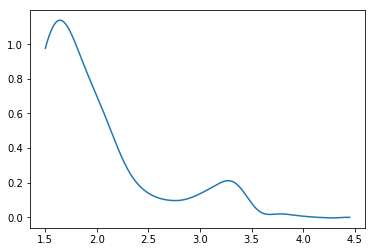

In [11]:
dists_2b = np.linspace(grid_start, r_cut, num_2b)
plt.plot(dists_2b, -grid_2b(dists_2b, nu=0))
# plt.plot(dists_2b, grid_2b(dists_2b, nu=1))

In [12]:
model_3b = ThreeBodySingleSpeciesModel(elementslist[0], r_cut, sigma_3b, r_cut / 10.0, noise)
model_3b.fit(tr_confs, tr_forces)

INFO:m_ff.kernels.threebodykernel:Started compilation of theano three body kernels
INFO:m_ff.kernels.threebodykernel:Ended compilation of theano three body kernels


In [13]:
# Test the GP performance
print('Testing GP')

gp_forces = np.zeros((ntest, 3))
gp_error = np.zeros((ntest, 3))

for i in np.arange(ntest):
    gp_forces[i, :] = model_3b.predict(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i, :] = gp_forces[i, :] - tst_forces[i, :]

MAEF = np.mean(np.sqrt(np.sum(np.square(gp_error), axis=1)))
SMAEF = np.std(np.sqrt(np.sum(np.square(gp_error), axis=1)))

MF = np.mean(np.linalg.norm(tst_forces, axis=1))

print('MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF, SMAEF))
print('Relative MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF / MF, SMAEF / MF))

Testing GP
MAEF on forces: 0.0836 +- 0.0403
Relative MAEF on forces: 0.1101 +- 0.0531


In [ ]:
grid_3b = model_3b.build_grid(grid_start, num_3b)

In [ ]:
dists_3b = np.linspace(grid_start, r_cut, num_3b)

z_min, z_max = -.4, .4
for i in range(0, num_3b, 20):
    plt.title(dists_3b[i])
    
    dists_k = np.ones_like(dists_3b) * dists_3b[i]
    X, Y = np.meshgrid(dists_3b, dists_3b)

    g_data = grid_3b(X.flatten(), Y.flatten(), np.ones_like(X.flatten()) * dists_3b[i]).reshape(num_3b, num_3b)

    plt.pcolor(dists_3b, dists_3b, -g_data, cmap='RdBu', vmin=z_min, vmax=z_max)
#     plt.pcolor(dists_3b, dists_3b, -g_data[:,:,i], cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar()
    plt.axis('equal')

    plt.show()

In [ ]:
model_c = CombinedSingleSpeciesModel(elementslist[0], r_cut, sigma_2b, sigma_3b, r_cut / 10.0, r_cut / 10.0, noise)
model_c.fit(tr_confs, tr_forces)

In [ ]:
# Test the GP performance
print('Testing GP')

gp_forces = np.zeros((ntest, 3))
gp_error = np.zeros((ntest, 3))

for i in np.arange(ntest):
    gp_forces[i, :] = model_c.predict(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i, :] = gp_forces[i, :] - tst_forces[i, :]

MAEF = np.mean(np.sqrt(np.sum(np.square(gp_error), axis=1)))
SMAEF = np.std(np.sqrt(np.sum(np.square(gp_error), axis=1)))

MF = np.mean(np.linalg.norm(tst_forces, axis=1))

print('MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF, SMAEF))
print('Relative MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF / MF, SMAEF / MF))

## Mapping

In [ ]:

grid_c_2b, grid_c_3b = model_c.build_grid(grid_start, num_2b, num_3b)


In [ ]:
dists_2b = np.linspace(grid_start, r_cut, num_2b)
plt.plot(dists_2b, grid_c_2b(dists_2b, nu=0))
plt.plot(dists_2b, grid_c_2b(dists_2b, nu=1))

In [ ]:
dists_3b = np.linspace(grid_start, r_cut, num_3b)

z_min, z_max = -.4, .4
for i in range(0, num_3b, 20):
    plt.title(dists_3b[i])
    
    dists_k = np.ones_like(dists_3b) * dists_3b[i]
    X, Y = np.meshgrid(dists_3b, dists_3b)

    g_data = grid_c_3b(X.flatten(), Y.flatten(), np.ones_like(X.flatten()) * dists_3b[i]).reshape(num_3b, num_3b)

    plt.pcolor(dists_3b, dists_3b, -g_data, cmap='RdBu', vmin=z_min, vmax=z_max)
#     plt.pcolor(dists_3b, dists_3b, -g_data[:,:,i], cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar()
    plt.axis('equal')

    plt.show()

## ASE Calculator

In [ ]:

def rmse(x1, x2):
    rms = np.sqrt(np.sum(np.square(x1 - x2), axis=1))
    return np.mean(rms), np.std(rms)
    

In [ ]:
# grid_2b = TwoBodySingleSpeciesGrid.from_file(str(directory / 'MFF_2b_ntr_20_sig_0.30_cut_4.45.npy'))
# grid_3b = ThreeBodySingleSpeciesGrid.from_file(str(directory / 'MFF_3b_ntr_20_sig_0.60_cut_4.45.npy'))

# calc = ThreeBodySingleSpecies(r_cut=4.45, grid_2b=grid_2b, grid_3b=grid_3b)


# filename = directory / 'movie.xyz'
# traj = read(str(filename), index=slice(0,5))
# for atoms in traj[0:5]:

#     atoms.set_calculator(calc)

#     rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
#     print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))



In [ ]:
calc = TwoBodySingleSpecies(r_cut, grid_2b)

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 10))

for atoms in traj:

    atoms.set_calculator(calc)

    rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))
    
f2 = atoms.get_forces()

In [ ]:
calc = TwoBodySingleSpecies(r_cut, grid_c_2b)

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 10))

for atoms in traj:

    atoms.set_calculator(calc)

    rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))
    
f2 = atoms.get_forces()

In [ ]:
calc = ThreeBodySingleSpecies(r_cut, grid_3b)

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 10))

for atoms in traj:

    atoms.set_calculator(calc)

    rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))
    
f3 = atoms.get_forces()

In [ ]:
calc = CombinedSingleSpecies(r_cut, grid_c_2b, grid_c_3b)

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 10))

for atoms in traj:

    atoms.set_calculator(calc)

    rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))

f23 = atoms.get_forces()